# Gráficos com Pandas


In [2]:
import pandas as pd

In [4]:
dataset = pd.read_csv('./datasets/AirPassengers.csv')

In [5]:
dataset_2 = pd.read_csv('./datasets/census.csv')

Cada gráfico é indicado para um tipo de dado, por exemplo, os gráficos de linhas são indicados para mostrar series temporais, histogramas são bons para demonstrar a distribuição de valores numéricos e gráficos de  barras são bons para representar categorias

# Gráfico de Linha

## Gráfico básico

O comando básico para gerar um gráfico no Pandas é o `.plot()` que gerará um gráfico de linhas.

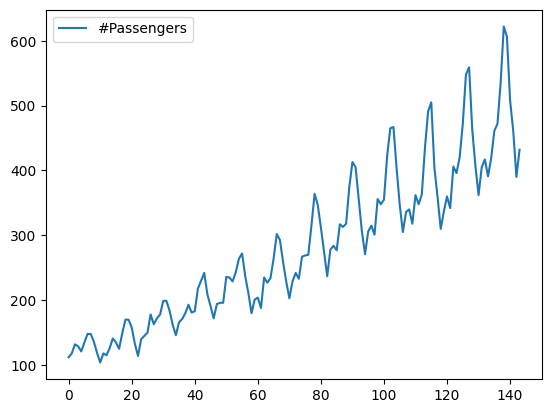

In [ ]:
dataset.plot();

## Definindo eixos

Ao usar o método `.set_index()` antes do plot, é possível definir qual coluna será usada como eixo X do gráfico.

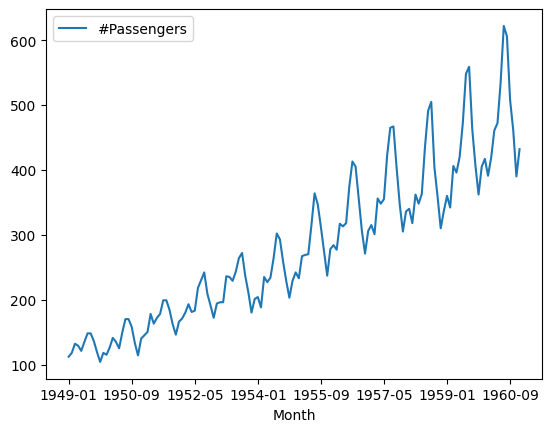

In [ ]:
dataset.set_index('Month').plot();

Também é possível ter o mesmo resultado com o parâmetro `x x = [...] ` do método plot.

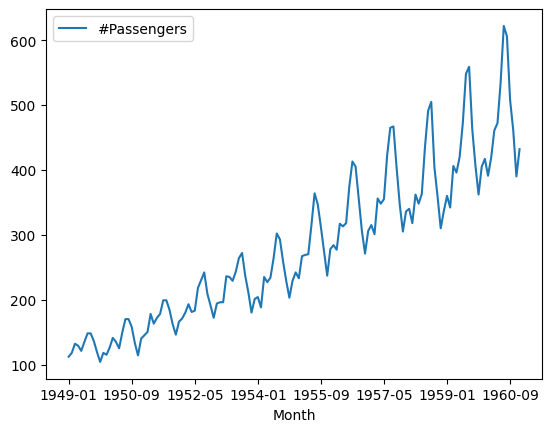

In [ ]:
dataset.plot(x = "Month");

## Filtrando intervalos

Usando loc antes do plot é possível definir a faixa dos dados com a qual se quer gerar os dados.

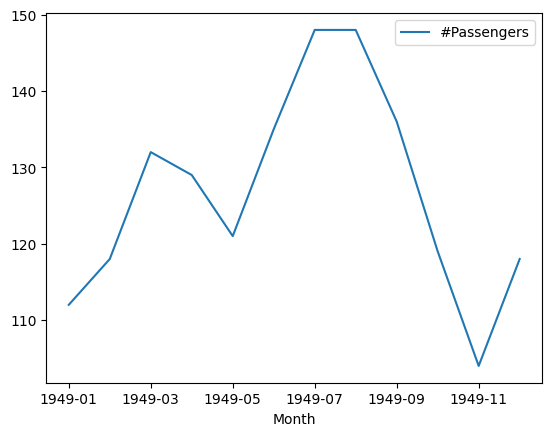

In [ ]:
dataset.set_index("Month").loc['1949-01':"1949-12"].plot();

# Formatação

Formatações envolvem definir elementos dos gráficos para transmitir melhor as informações como: título do gráfico, título dos eixos x e y, cor da linha, estilo da linha, etc

## Títulos (gráfico, eixo x e eixo y)

Para definir o nome do gráfico, use o parâmetro `title = ".."`.<br>
Para definir o título dos eixos x e y, use `xlabel = "..."` e `ylabel = "..."`, respectivamente.<br>

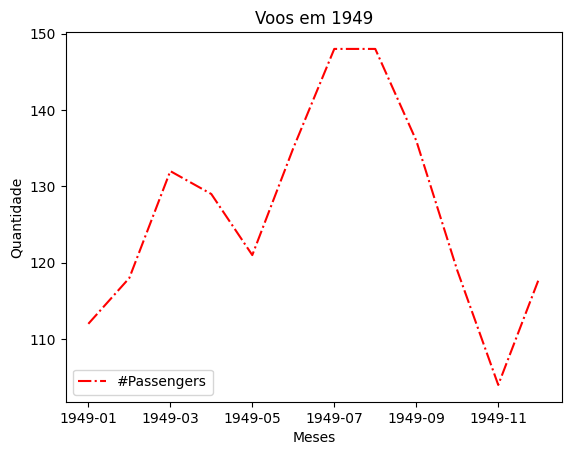

In [ ]:
dataset.set_index("Month").loc['1949-01':"1949-12"].plot(title = "Voos em 1949",
                                                         xlabel="Meses",
                                                         ylabel="Quantidade").legend(loc = "lower left");

## Cor e Estilo da Linha
Para configurar a cor da linha use o parâmetro `color = "..."` <br>
Para configurar o estilo use `style = "..."` (consultar documentação para detalhes dos sinais)<br>

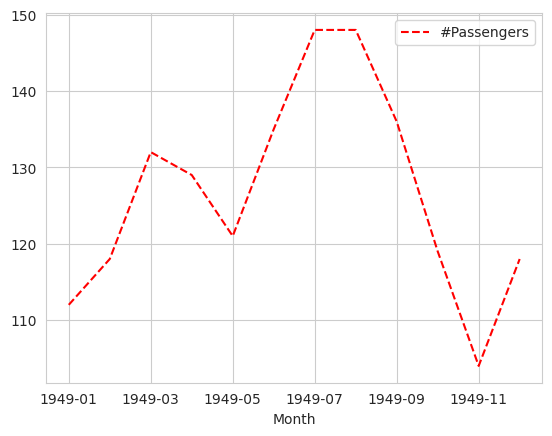

In [ ]:
dataset.set_index("Month").loc['1949-01':"1949-12"].plot(color = "red",
                                                         style="--");

## Formatando a Legenda



### legend(loc = '...')

É preciso usar `plot().legend(loc = "...")` para editar a posição da legenda dentro do gráfico. esse parâmetro recebe valores como "lower right", "lower left", "best", etc. (Consultar docs para saber os valores)<br>


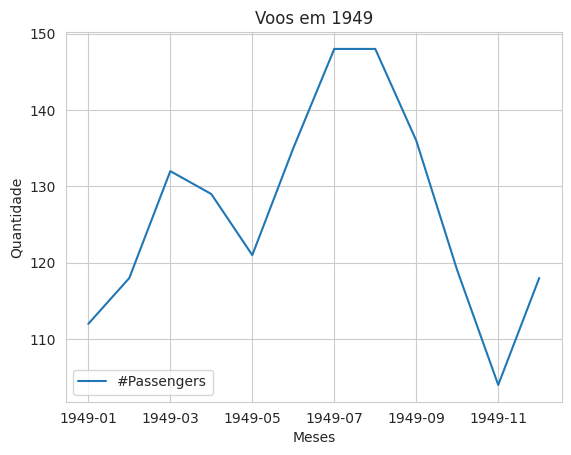

In [ ]:
dataset.set_index("Month").loc['1949-01':"1949-12"].plot(title = "Voos em 1949",
                                                         xlabel="Meses",
                                                         ylabel="Quantidade"
                                                        ).legend(loc = "lower left");

### legend(bbox_to_anchor = (x, y))

Usar esse parâmetro permite ajustar a posição da legenda usando coordenadas passadas em uma tupla.

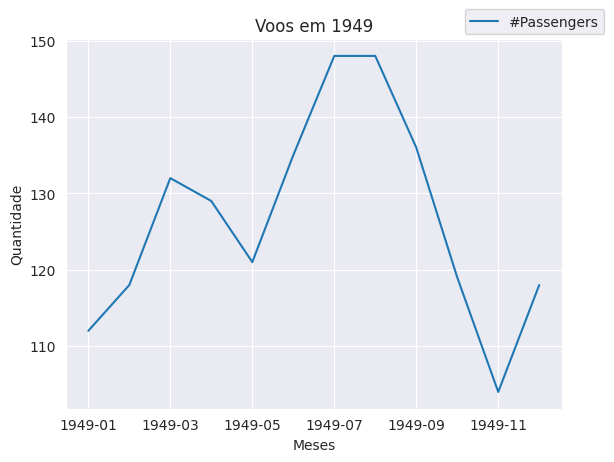

In [ ]:
dataset.set_index("Month").loc['1949-01':"1949-12"].plot(title = "Voos em 1949",
                                                         xlabel="Meses",
                                                         ylabel="Quantidade").legend(bbox_to_anchor = (1.1, 1.1));

## Formatando grid com Seaborn

Importando a lib e definindo o estilo.<br>
O método aceita dos valores: "darkgrid", "dark, "whitegrid", "white" ou "ticks"

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

Após configurado o set_style os gráficos virão com o grid conforme settado.

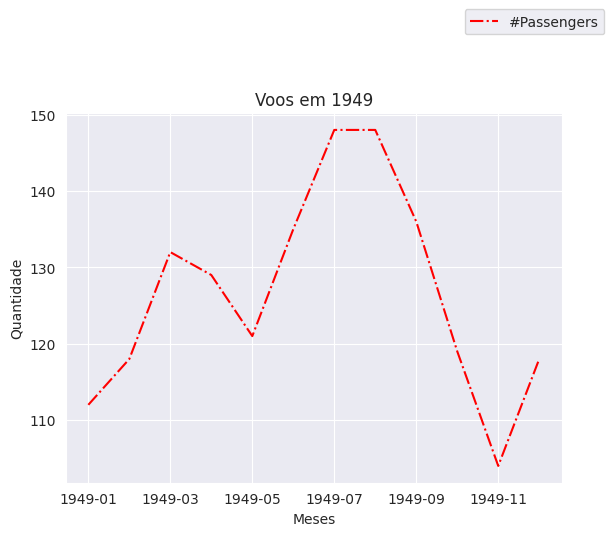

In [ ]:
dataset.set_index("Month").loc['1949-01':"1949-12"].plot(title = "Voos em 1949",
                                                         xlabel="Meses",
                                                         ylabel="Quantidade",
                                                         color = "red",
                                                         style="-.",
                                                         legend=True).legend(bbox_to_anchor = (1.1, 1.3));

# Subgráficos

Quando se usa plot num dataset de vários atributos ele gerará um gráfico onde todos os dados estão misturados.

In [ ]:
dataset_2.dtypes

,0
age,int64
workclass,object
final-weight,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


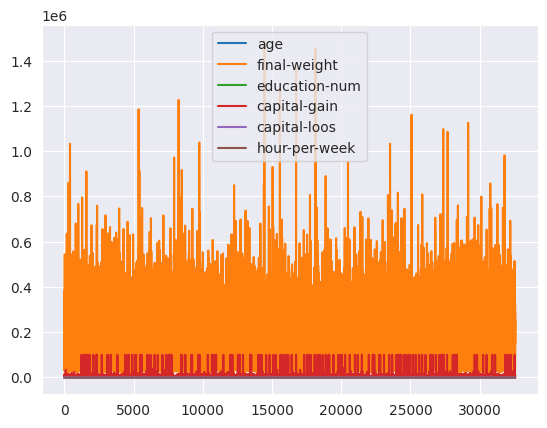

In [ ]:
dataset_2.plot();

## Criando subgráficos

Para contornar isso, passe o parâmetro `subplots = True` que dividirá o gráfico único, com os atributos misturados, em vários gráficos, um para cada atributo.

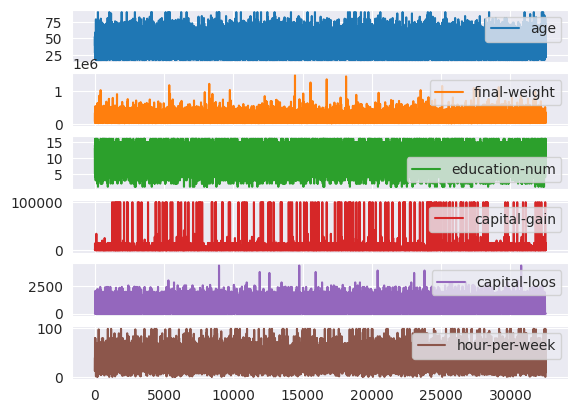

In [ ]:
dataset_2.plot(subplots=True);

## Formatando subgráficos

### Layout

Passando uma tupla com a disposição dos gráficos é possível definir em quantas linhas e colunas eles aparecerão.

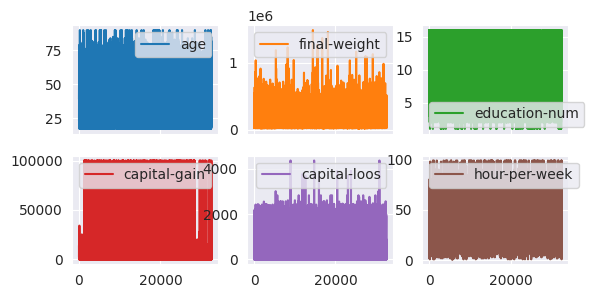

In [ ]:
dataset_2.plot(subplots=True, layout=(3, 3));

### Tamanho dos subgráficos

Usando o parâmetro `figsize = (x, y)` definimos a largura e altura dos gráficos.

In [ ]:
dataset_2.plot(subplots=True, layout=(3,3), figsize=(10, 10));

### Títulos e legendas

Para dar títulos a cada gráfico basta passar o parâmetro title com uma lista dos títulos desejados.<br>
É comum desativar legendas nesses casos devido à grande quantidades de informações, para isso, use `legend = False`


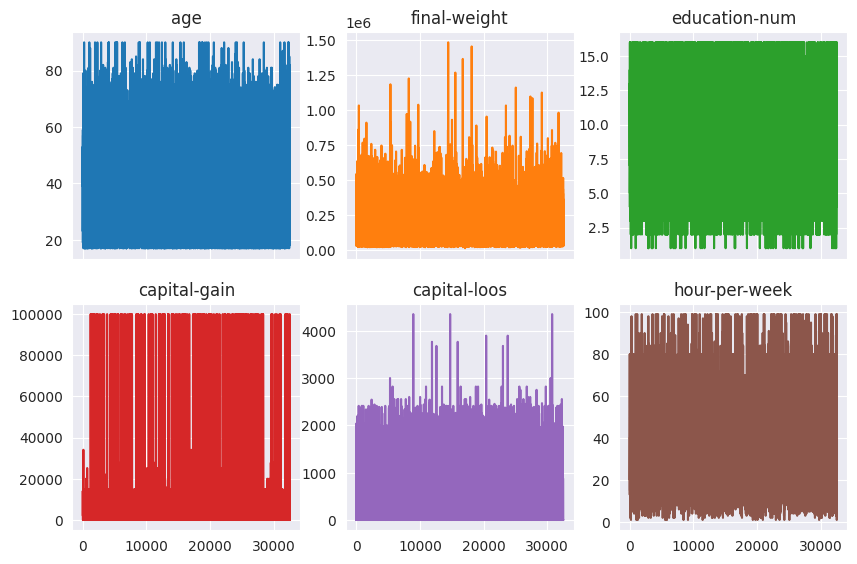

In [ ]:
dataset_2.plot(subplots=True, layout=(3,3), figsize=(10, 10),
               title= ['age', 'final-weight', 'education-num', 'capital-gain', 'capital-loos', 'hour-per-week'], legend=False);

## Tipo do Gráfico

O parâmetro `kind = '...'` é usado para definir o tipo do gráfico que pode ser de linha, barras, histograma, boxplot, etc. Por padrão, ele é "line".<br>
(Consultar documentação do Pandas.DataFrame.plot() para saber qual código usar)

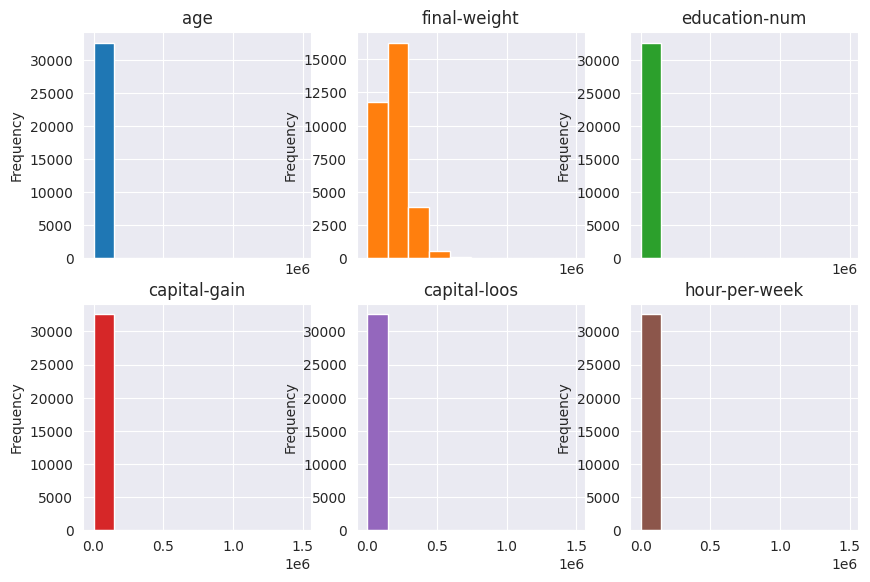

In [ ]:
dataset_2.plot(subplots=True, layout=(3,3), figsize=(10, 10),
               title= ['age', 'final-weight', 'education-num', 'capital-gain', 'capital-loos', 'hour-per-week'], legend=False,kind="hist");

# Grafico de Barras

Gráficos desses tipo são idealmente usados para lidar com elementos categóricos. Agrupa-se os elementos, aplica uma função de agregação qualquer e então se plota os valores.

In [ ]:
dataset_2.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

## Exemplo 1

Agrupamento workclass com agregação de idades

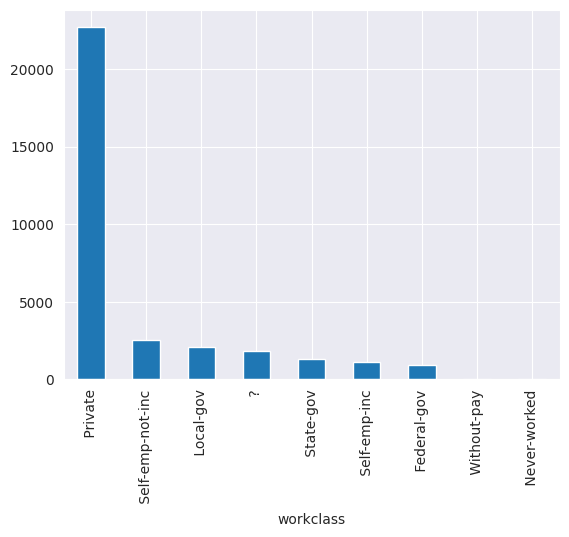

In [ ]:
dataset_2.groupby('workclass')['age'].count().sort_values(ascending=False).plot(kind='bar');

Caso queira, é possível transformar o gráfico em barras horizontais bastando o parâmetro `kind = barh`.

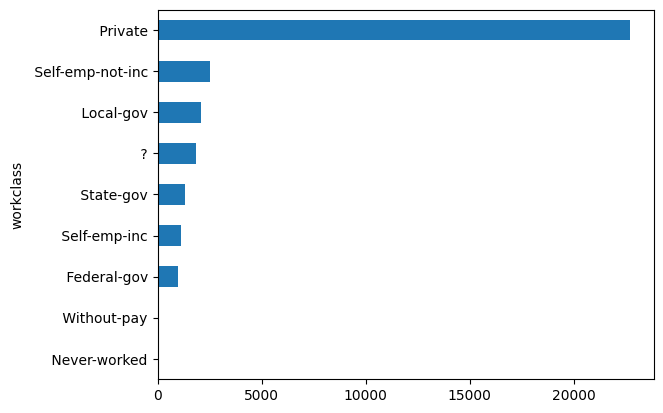

In [ ]:
dataset_2.groupby('workclass')['age'].count().sort_values().plot(kind='barh');

## Criando a partir de uma tabela pivô

Esse tipo de criação gerará um número de agrupamento de colunas de acordo com o número de linhas da tabela, no caso abaixo são apenas duas por conta do income apenas ter duas categorias.

In [ ]:
pivot = dataset_2.query("workclass != ' Never-worked' and workclass != ' Without-pay'").pivot_table(index = 'income', columns = 'workclass', values= 'education-num', aggfunc='sum').apply(lambda x: x * 100 /sum(x), axis=1)
pivot

workclass,?,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov
income,,,,,,,
<=50K,6.262579,2.605364,6.589146,70.676466,2.125640,7.434676,4.306129
>50K,2.371303,4.788735,8.230914,62.296396,8.117785,9.186464,5.008402


Observe que a criação é feita com `.plot.bar()` ao invés de usar o parâmetro kind.

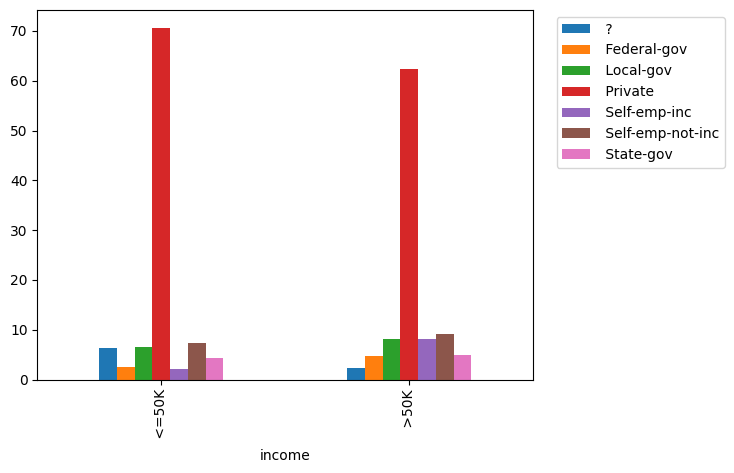

In [ ]:
pivot.plot.bar().legend(bbox_to_anchor = (1.4, 1));

O parâmetro `stacked = True` faz com que as colunas sejam empilhadas

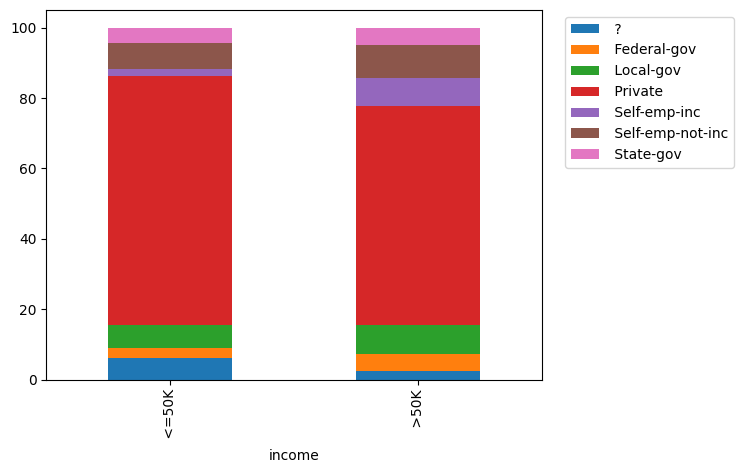

In [ ]:
pivot.plot.bar(stacked=True).legend(bbox_to_anchor = (1.4, 1));

# Gráfico de Setores

Esse tipo de gráfico é ótimo para demonstrar o percentual do todo que o valor de uma categoria representa. No exemplo abaixo é possível ver quanto cada classe de workclass tem de idades das pessoas no dataset. <br>
O parâmetro `ylabel = ''` serve para ocultar a exibição do título desse eixo.

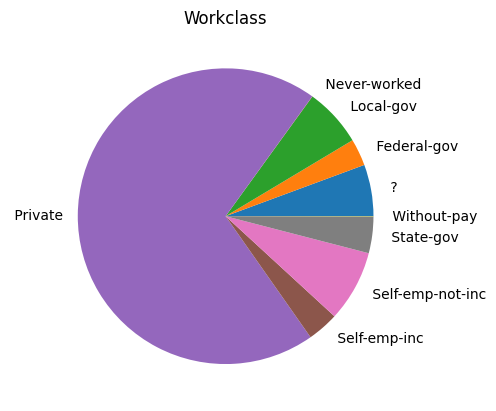

In [ ]:
dataset_2.groupby('workclass')['age'].count().plot.pie(title = 'Workclass', ylabel = '');

# Gráfico de Dispersão

Esse tipo de gráfico é utilizado para fazer o relacionamento entre duas colunas numéricas. Ele é muito útil para gerar insights através de como os dados se comportam.

In [ ]:
dataset_2.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

## Exemplo 1

O gráfico é gerado usando o método `.scatter(x = '', y = '')`.<br>
Veja que capital-gain e education-num são variáveis numéricas. A correlação estabelecida no gráfico é "o ganho de capital de uma pessoa de acordo com o quanto ela estudou, em anos".

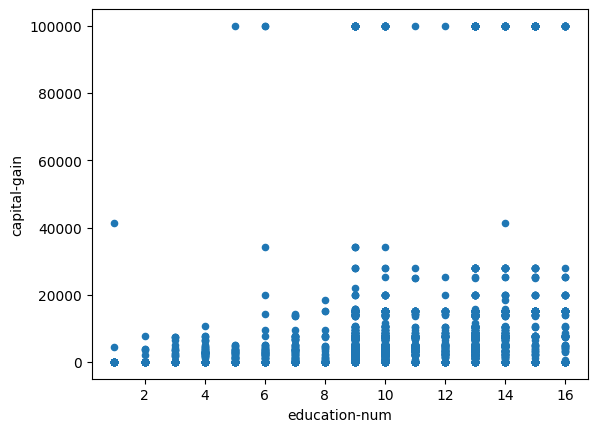

In [ ]:
dataset_2.plot.scatter(x = 'education-num', y='capital-gain');

## Exemplo 2

A correlação abaixo é entre as horas trabalhadas por semana e o número de anos que uma pessoa estudou.<br>
Observe que a maioria das pessoas estão concentradas na linha de 9 anos estudados.

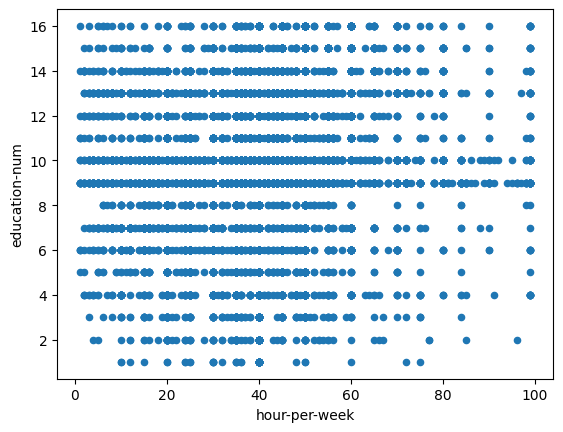

In [ ]:
dataset_2.plot.scatter(x = 'hour-per-week', y='education-num');

## Exemplo 3

Relacionamento entre horas trabalhadas por semana e ganho de capital. Basicamente, quanto de acrescimo de capital a pessoa terá conforme as horas que trabalha.<br>
Observando o gráfico conclui-se que, as pessoas com ganho de 100K trabalham de 20 a 80 horas por semana.

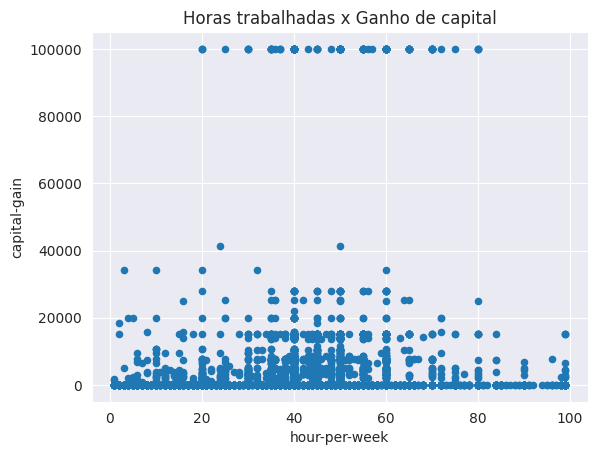

In [ ]:
dataset_2.plot.scatter(x = 'hour-per-week', y='capital-gain', title= 'Horas trabalhadas x Ganho de capital');

# Histograma

Utilizado para analisar a distribuição de frequência de atributos numéricos, ou seja, quanto de cada valor de uma coluna caí em cada categoria.

## Exemplo 1

Distribuíção das idades no dataset, ou seja, quantidade de pessoas com cada idade.

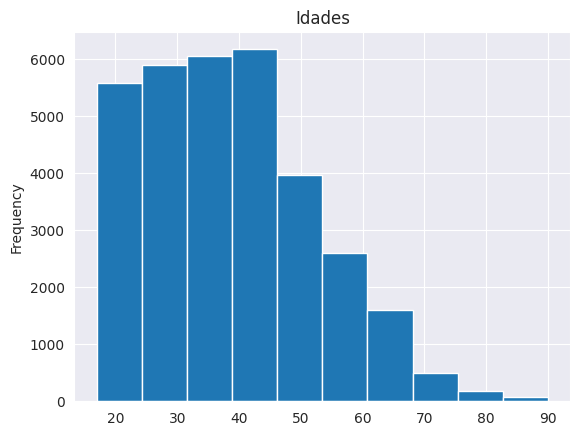

In [ ]:
dataset_2["age"].plot.hist(title= "Idades");

## Exemplo 2

Mostra quantas pessoas estudaram certa quantidade de anos

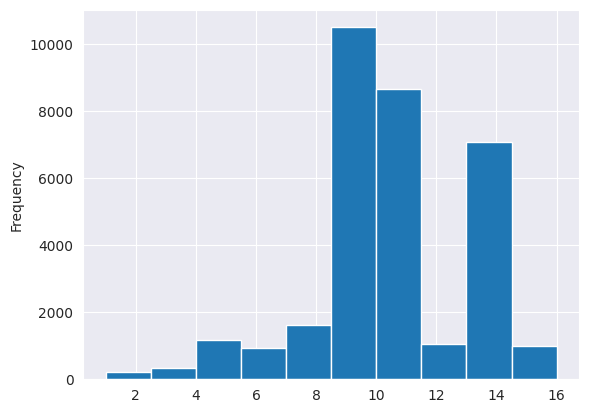

In [ ]:
dataset_2['education-num'].plot.hist();

## Exemplo 3

Dependendo da diferença entre as quantidades nas categorias a visualização se torna muito difícil, como no caso abaixo onde a maior parte está entre 0 e cerca de 10K tornando quase impossível ver as quantidades nas outras categorias.

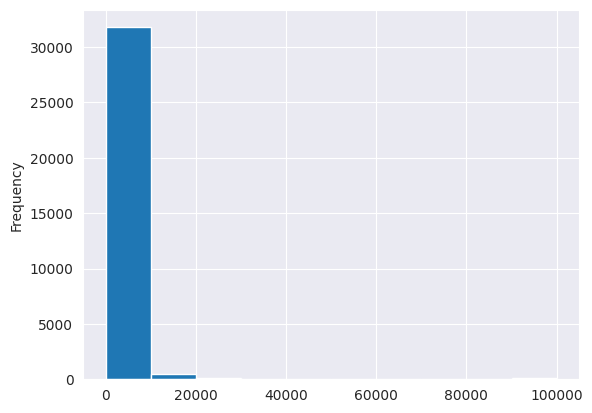

In [ ]:
dataset_2['capital-gain'].plot.hist();

## Sobrepondo

Pode-se usar mais de uma coluna de modo que a exibição será de todas no mesmo gráfico. Nessas situações o ideal é tornar as colunas mais transparentes de modo a enxergar através delas, com o parâmetro `alpha = x` no método `hist()`.

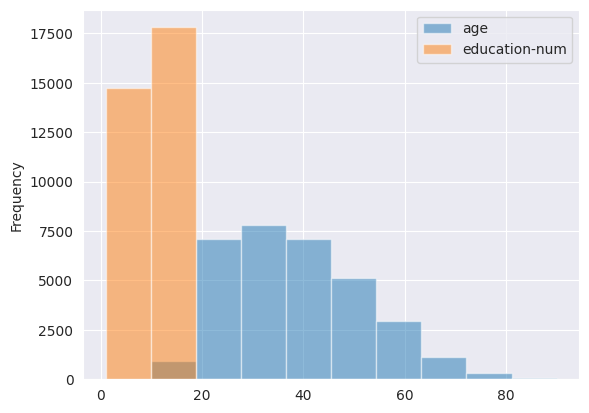

In [ ]:
dataset_2[['age', 'education-num']].plot.hist(alpha=0.5);

## Exemplo X

No exemplo abaixo está exibido o que acontece caso se crie um histograma usando toda a base de dados, sem filtrar nada.

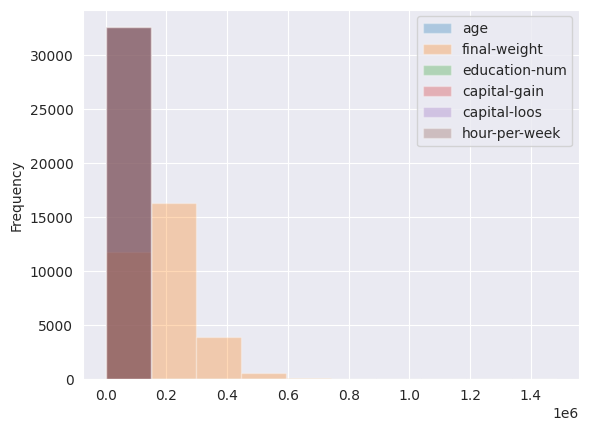

In [ ]:
plot = dataset_2.plot.hist(alpha = 0.3);

# Salvando Gráficos

Para salvar um gráfico, em png, primeiro guarde o plot numa variável qualquer e então chame `.figure.savefig('<titulo_da_imagem.png>')`

In [ ]:
plot.figure.savefig('histogram.png')